### Working with Different Graphing Utilities

- Not everything worked out well so this turned into a notebook to play around in Tableau.

- Data : https://data.wprdc.org/dataset/uniform-crime-reporting-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly
import plotly.graph_objects as go

from tqdm import tqdm_notebook

In [2]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 100

### historicals

In [8]:
hdf = pd.read_csv('https://data.wprdc.org/dataset/5e6711a3-90e5-457d-8c73-445fb5f363e2/resource/391942e2-25ef-43e4-8263-f8519fa8aada/download/archive-police-blotter.csv', 
                  index_col=0)
hdf.head(2)

,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,HIERARCHYDESC,OFFENSES,INCIDENTTRACT,X,Y
PK,,,,,,,,,,,,
2075487,5000381,6,1/1/2005 8:00,"5400 Block NORTHUMBERLAND ST PITTSBURGH, PA",N,Squirrel Hill North,4,MOTOR THEFT (OTHER)-PLATE ONLY,3921 Theft by Unlawful Taking or Disposition.,1401.0,-79.934027,40.43887
2075783,5001279,7,1/3/2005 2:00,"PARKVIEW PITTSBURGH, PA",N,Squirrel Hill North,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,407.0,0.000000,0.00000


In [9]:
hdf.columns = [c.lower() for c in hdf.columns]
hdf['incidenttime'] = pd.to_datetime(hdf.incidenttime)

In [10]:
hdf.head(2)

,ccr,hierarchy,incidenttime,incidentlocation,clearedflag,incidentneighborhood,incidentzone,hierarchydesc,offenses,incidenttract,x,y
PK,,,,,,,,,,,,
2075487,5000381,6,2005-01-01 08:00:00,"5400 Block NORTHUMBERLAND ST PITTSBURGH, PA",N,Squirrel Hill North,4,MOTOR THEFT (OTHER)-PLATE ONLY,3921 Theft by Unlawful Taking or Disposition.,1401.0,-79.934027,40.43887
2075783,5001279,7,2005-01-03 02:00:00,"PARKVIEW PITTSBURGH, PA",N,Squirrel Hill North,4,MTR VEH THEFT (AUTO),3921 Theft by Unlawful Taking or Disposition.,407.0,0.000000,0.00000


### recents

In [11]:
rdf = pd.read_csv('https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e', index_col=0)
rdf.columns = [c.lower() for c in rdf.columns]
rdf['incidenttime'] = pd.to_datetime(rdf.incidenttime)
rdf.head()

,ccr,hierarchy,incidenttime,incidentlocation,clearedflag,incidentneighborhood,incidentzone,incidenthierarchydesc,offenses,incidenttract,council_district,public_works_division,x,y
PK,,,,,,,,,,,,,,
2802309,16000001.0,10,2016-01-01 00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
2803174,16004547.0,11,2016-01-01 00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2801809,16000367.0,4,2016-01-01 00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
2802315,16000035.0,10,2016-01-01 00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
2802312,16000024.0,4,2016-01-01 00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


## merge the dataframes

In [8]:
df = pd.concat([hdf,rdf], axis=0, join='outer')
print(hdf.shape, rdf.shape, df.shape)

C:\Users\H11040\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




(495251, 12) (179202, 14) (674453, 15)


### heirachy

In [9]:
df.hierarchy.value_counts(normalize=True).sort_index()*100

0      0.045074
1      0.098005
2      0.260656
3      2.650444
4      2.752156
5      5.867718
6     18.098963
7      2.833407
8      0.133590
9      1.093775
10    11.390860
11     2.882187
12     0.114018
13     0.373933
14     9.680289
15     0.874931
16     0.590553
17     0.558675
18     4.969360
19     0.014975
20     0.223589
21     1.628579
22     0.160130
23     0.845129
24     2.551104
25     0.000890
26     4.889295
28     0.002965
29     0.093261
99    24.321487
Name: hierarchy, dtype: float64

In terms of hierarchy, 99 had the most occurences followed by 6, 10, and 14 in double digits.

### cleared flag

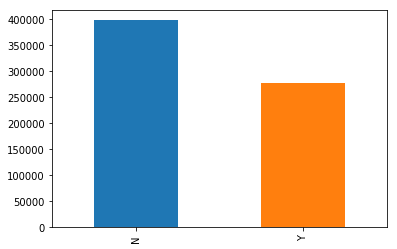

In [10]:
df.clearedflag.value_counts().plot(kind='bar');

Not sure what cleared flag is but more Nos.

### incident neighborhood

In [11]:
# df.incidentneighborhood.value_counts()

There are 98 different neighborhoods.

### incident zone

In [12]:
df.incidentzone.value_counts()

3                 160672
5                 123383
1                 117223
2                 110109
4                 106927
6                  51189
OSC                 2519
OUTSIDE             2397
9                     12
SAFC                   4
TRU                    3
NARC/VICE              2
HAPD                   2
SDD                    2
PROPROOM               2
PROF STANDARDS         1
Name: incidentzone, dtype: int64

I am imagining that these are police zones. If we connect these to the longitudes and latitudes we could get an idea if this is true.

In [13]:
for v in df.incidentzone.value_counts().index:
    print(v)
    temp = df[df.incidentzone == v][['x','y']]
    print(temp.describe().T[['count','mean','std','min','50%','max']])
    print("\n")

3
      count       mean        std        min        50%        max
x  158154.0 -77.356431  14.288791 -80.393973 -79.990414   0.000000
y  158154.0  39.085180   7.219579   0.000000  40.421532  42.134759


5
      count       mean        std        min        50%        max
x  121308.0 -77.465536  13.780383 -80.255268 -79.918985   0.000000
y  121308.0  39.222284   6.977268   0.000000  40.462132  40.600317


1
      count       mean        std        min        50%        max
x  114782.0 -76.559815  16.256724 -80.503807 -80.009965   0.000000
y  114782.0  38.718545   8.221504   0.000000  40.460769  40.731905


2
      count       mean        std        min        50%        max
x  108102.0 -75.870545  17.658597 -80.393973 -79.980382   0.000000
y  108102.0  38.370344   8.930566   0.000000  40.443581  40.775362


4
      count       mean        std        min        50%        max
x  105155.0 -76.933692  15.197055 -80.393973 -79.933849   0.000000
y  105155.0  38.916783   7.687422   0.000000

### quantile out the data

<font color='red' size=4> Instead of doing it for the entire data set, we should do it specifically for each "neighborhood". This should in turn dial in the outlier items for each neighborhood. </font>

In [14]:
df[['x','y']].describe()

,x,y
count,662378.000000,662378.000000
mean,-76.600695,38.736957
std,16.076610,8.129936
min,-80.503807,0.000000
25%,-80.004250,40.425447
50%,-79.980562,40.445318
75%,-79.933747,40.459416
max,0.000000,42.165091


In [15]:
print(df[['x','y']].quantile(.01))
print(df[['x','y']].quantile(.99))

x   -80.063624
y     0.000000
Name: 0.01, dtype: float64
x     0.000000
y    40.488082
Name: 0.99, dtype: float64


In [16]:
# min_x = df.x.quantile(0.05)
# max_x = df.x.quantile(0.95)
# min_y = df.y.quantile(0.05)
# max_y = df.y.quantile(0.95)

# print(df.shape)
# df = df[(df.x <= max_x) &\
#         (df.x >= min_x) &\
#         (df.y <= max_y) &\
#         (df.y >= min_y)]

# print(df.shape)

In [17]:
df_new = pd.DataFrame()
for i in df.incidentneighborhood.unique():
    temp = df[df.incidentneighborhood == i]
    
    min_x = temp.x.quantile(0.05)
    max_x = temp.x.quantile(0.95)
    min_y = temp.y.quantile(0.05)
    max_y = temp.y.quantile(0.95)
    
    temp2 = temp[(temp.x <= max_x) &\
            (temp.x >= min_x) &\
            (temp.y <= max_y) &\
            (temp.y >= min_y)]

    df_new = pd.concat([df_new, temp2], axis=0, join='outer')

In [18]:
print(df.shape, df_new.shape)

(674453, 15) (575104, 15)


In [19]:
df = df_new.copy()

### offenses

In [20]:
df['offense_code'] = [c.split()[0] for c in df.offenses]

In [21]:
df.offense_code.value_counts()

3304                72969
3921                50542
9999                32365
2701                30408
3502                30190
3745                29908
3934                18796
2709                17890
3743                15624
2702                13949
3921(a)             12600
13(a)(16)           12152
3701                11700
3929                 9988
9497                 8462
9489                 7945
2709(a)              7686
9496                 7158
4106                 6865
2706                 6800
9501                 5921
2709(a)(1)           5751
1543                 5638
3924                 5336
903                  5020
9504                 4592
5505                 4544
3922                 4210
13(a)(31)            4162
9498                 4080
901                  3998
5503                 3980
4120                 3803
13(a)(32)            3433
2705                 3326
3928                 3163
2701(a)(1)           2896
3925                 2700
9124        

### incident time

In [22]:
df.incidenttime.head(10)

PK
2075487   2005-01-01 08:00:00
2081020   2005-01-23 16:00:00
2082845   2005-02-04 10:30:00
2079570   2005-01-12 23:45:00
2079575   2005-01-14 03:07:00
2081054   2005-01-22 14:50:00
2083653   2005-02-08 13:54:00
2078945   2005-01-10 01:20:00
2078948   2005-01-10 01:38:00
2079996   2005-01-16 16:10:00
Name: incidenttime, dtype: datetime64[ns]

Get the year, month, day and hour.

In [23]:
df['it_yr'] = df.incidenttime.dt.year
df['it_mon'] = df.incidenttime.dt.month
df['it_day'] = df.incidenttime.dt.day
df['it_hr'] = df.incidenttime.dt.hour
df['date'] = df.incidenttime.dt.round('D') + pd.offsets.MonthBegin(0)

In [24]:
df.date.head(10)

PK
2075487   2005-01-01
2081020   2005-02-01
2082845   2005-03-01
2079570   2005-02-01
2079575   2005-02-01
2081054   2005-02-01
2083653   2005-03-01
2078945   2005-02-01
2078948   2005-02-01
2079996   2005-02-01
Name: date, dtype: datetime64[ns]

Group out the hours - I did this in my own way.

- 11 PM to 2 AM is **LATE NIGHT**
- 2 AM to 6 AM is **EARLY MORN**
- 6 AM to 12 PM is **MORN**
- 12 PM to 6 PM is **AFTERNOON**
- 6 PM to 11PM is **NIGHT**

In [25]:
df['is_late_night'] = 0
df['is_late_night'] = 1*((df.it_hr <= 2) | (df.it_hr > 23)) ##the only OR

df['is_early_morn'] = 0
df['is_early_morn'] = 1*((df.it_hr <= 6) & (df.it_hr > 2))

df['is_morn'] = 0
df['is_morn'] = 1*((df.it_hr <= 12) & (df.it_hr > 6))

df['is_afternoon'] = 0
df['is_afternoon'] = 1*((df.it_hr <= 18) & (df.it_hr > 12))

df['is_night'] = 0
df['is_night'] = 1*((df.it_hr <= 23) & (df.it_hr > 18))

In [26]:
df.head(2)

,ccr,clearedflag,council_district,hierarchy,hierarchydesc,incidenthierarchydesc,incidentlocation,incidentneighborhood,incidenttime,incidenttract,incidentzone,offenses,public_works_division,x,y,offense_code,it_yr,it_mon,it_day,it_hr,date,is_late_night,is_early_morn,is_morn,is_afternoon,is_night
PK,,,,,,,,,,,,,,,,,,,,,,,,,,
2075487,5000381,N,NaN,6,MOTOR THEFT (OTHER)-PLATE ONLY,NaN,"5400 Block NORTHUMBERLAND ST PITTSBURGH, PA",Squirrel Hill North,2005-01-01 08:00:00,1401.0,4,3921 Theft by Unlawful Taking or Disposition.,NaN,-79.934027,40.438870,3921,2005,1,1,8,2005-01-01,0,0,1,0,0
2081020,5011868,N,NaN,99,NaN,NaN,"1000 Block MOREWOOD AV PITTSBURGH, PA",Squirrel Hill North,2005-01-23 16:00:00,1401.0,4,3743 Accidents Involving Damage to Attended Ve...,NaN,-79.942639,40.446855,3743,2005,1,23,16,2005-02-01,0,0,0,1,0


In [27]:
df['is_time'] = df[['is_late_night','is_early_morn','is_morn','is_afternoon','is_night']].idxmax(axis=1)

In [28]:
df.is_late_night.value_counts()

0    499128
1     75976
Name: is_late_night, dtype: int64

In [29]:
df.is_time.value_counts()

is_afternoon     184944
is_morn          144579
is_night         129007
is_late_night     75976
is_early_morn     40598
Name: is_time, dtype: int64

In [30]:
df.is_time.value_counts().sum()

575104

- According to the police blotter most incidents are happening in the afternoon followed closely by Morning and Night. 
- I would have thought a lot more occurred late night and early morning!

In [32]:
# temp = hdf[['date','hierarchy']].set_index('date')

# fig, ax=plt.subplots(1,1,figsize=(15,8))
# temp.loc[:'2008-01-01'].plot(ax=ax, marker='.', linestyle='');

In [33]:
# hdf[hdf.hierarchy == 99].head(5)

In [34]:
df[df.hierarchy == 99].hierarchydesc.value_counts()

Series([], Name: hierarchydesc, dtype: int64)

The 99 refers to Missing Descriptions and must cover a lot.

### Maps

In [35]:
inc_mag = df.groupby('incidentneighborhood').count()['ccr']

df['incident_magnitude'] = df.incidentneighborhood.map(inc_mag.to_dict()).fillna(0)
df['incident_count'] = 1
# for i in range(len(inc_mag)):
#     hdf['incident_magnitude'] = np.where(hdf.incidentneighborhood == inc_mag.index[i], inc_mag.values[i], 0)

In [36]:
df.head(10)

,ccr,clearedflag,council_district,hierarchy,hierarchydesc,incidenthierarchydesc,incidentlocation,incidentneighborhood,incidenttime,incidenttract,incidentzone,offenses,public_works_division,x,y,offense_code,it_yr,it_mon,it_day,it_hr,date,is_late_night,is_early_morn,is_morn,is_afternoon,is_night,is_time,incident_magnitude,incident_count
PK,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2075487,5000381,N,NaN,6,MOTOR THEFT (OTHER)-PLATE ONLY,NaN,"5400 Block NORTHUMBERLAND ST PITTSBURGH, PA",Squirrel Hill North,2005-01-01 08:00:00,1401.0,4,3921 Theft by Unlawful Taking or Disposition.,NaN,-79.934027,40.438870,3921,2005,1,1,8,2005-01-01,0,0,1,0,0,is_morn,7416,1
2081020,5011868,N,NaN,99,NaN,NaN,"1000 Block MOREWOOD AV PITTSBURGH, PA",Squirrel Hill North,2005-01-23 16:00:00,1401.0,4,3743 Accidents Involving Damage to Attended Ve...,NaN,-79.942639,40.446855,3743,2005,1,23,16,2005-02-01,0,0,0,1,0,is_afternoon,7416,1
2082845,5017698,Y,NaN,24,HARRASSMENT BY COMUN/ADDRESS,NaN,"300 Block ROSS ST PITTSBURGH, PA",Squirrel Hill North,2005-02-04 10:30:00,101.0,2,2709 Harassment (Non-Specific),NaN,-79.996720,40.437041,2709,2005,2,4,10,2005-03-01,0,0,1,0,0,is_morn,7416,1
2079570,5006786,N,NaN,26,CRIMINAL TRESPASS,NaN,"5800 Block 5TH AV PITTSBURGH, PA",Squirrel Hill North,2005-01-12 23:45:00,1402.0,4,9497 Aided Case,NaN,-79.927211,40.450039,9497,2005,1,12,23,2005-02-01,0,0,0,0,1,is_night,7416,1
2079575,5007125,N,NaN,14,CRIMINAL MISCHIEF,NaN,"1600 Block PENN AV PITTSBURGH, PA",Squirrel Hill North,2005-01-14 03:07:00,202.0,2,3304 Criminal Mischief.,NaN,-79.987415,40.448800,3304,2005,1,14,3,2005-02-01,0,1,0,0,0,is_early_morn,7416,1
2081054,5011402,Y,NaN,99,NaN,NaN,"WIGHTMAN ST & FORBES AV PITTSBURGH, PA",Squirrel Hill North,2005-01-22 14:50:00,1401.0,4,3743 Accidents Involving Damage to Attended Ve...,NaN,-79.927714,40.438039,3743,2005,1,22,14,2005-02-01,0,0,0,1,0,is_afternoon,7416,1
2083653,5019893,Y,NaN,15,PROHIBITED OFFENSIVE WEAPONS,NaN,"MURRAY AV & FORBES AV PITTSBURGH, PA",Squirrel Hill North,2005-02-08 13:54:00,1403.0,4,908 Prohibited Offensive Weapons. / 13(a)(16) ...,NaN,-79.922984,40.438056,908,2005,2,8,13,2005-03-01,0,0,0,1,0,is_afternoon,7416,1
2078945,5004911,Y,NaN,3,ROBBERY/HIGHWAY/STRONGARM,NaN,"1600 Block MURRAY AV PITTSBURGH, PA",Squirrel Hill North,2005-01-10 01:20:00,1403.0,4,3701 Robbery.,NaN,-79.923134,40.439763,3701,2005,1,10,1,2005-02-01,1,0,0,0,0,is_late_night,7416,1
2078948,5004916,Y,NaN,99,NaN,NaN,"REED ST & BRACKENRIDGE ST PITTSBURGH, PA",Squirrel Hill North,2005-01-10 01:38:00,504.0,2,9499 Violation of Auto Laws / 3733 Fleeing or ...,NaN,-79.971864,40.444993,9499,2005,1,10,1,2005-02-01,1,0,0,0,0,is_late_night,7416,1


In [37]:
print(df.shape)
df = df[np.abs(df.x) > 1e-6 ]
print(df.shape)

(575104, 29)
(565306, 29)


## Something to look into in the future...

- Maybe use K means to dial in the outlier incidents for each neighborhood...

- https://stackoverflow.com/questions/3663556/retrieving-the-us-postal-zip-code-for-a-street-address-using-python

In [38]:
df.incidentlocation

PK
2075487        5400 Block NORTHUMBERLAND ST PITTSBURGH, PA 
2081020              1000 Block MOREWOOD AV PITTSBURGH, PA 
2082845                   300 Block ROSS ST PITTSBURGH, PA 
2079570                   5800 Block 5TH AV PITTSBURGH, PA 
2079575                  1600 Block PENN AV PITTSBURGH, PA 
2081054             WIGHTMAN ST & FORBES AV PITTSBURGH, PA 
2083653               MURRAY AV & FORBES AV PITTSBURGH, PA 
2078945                1600 Block MURRAY AV PITTSBURGH, PA 
2078948           REED ST & BRACKENRIDGE ST PITTSBURGH, PA 
2079996             FORBES AV & MOREWOOD AV PITTSBURGH, PA 
2079997              2000 Block SMALLMAN ST PITTSBURGH, PA 
2079215        5600 Block AYLESBORO ST PITTSBURGH, PA 15217
2079547              1300 Block WIGHTMAN ST PITTSBURGH, PA 
2078102           BAUM BL & ENFIELD ST PITTSBURGH, PA 15232
2082166                   4700 Block 5TH AV PITTSBURGH, PA 
2082068               5700 Block FORWARD AV PITTSBURGH, PA 
2080214                   MAGEE ST & 

In [39]:
df.incident_magnitude.unique()

array([ 7416, 16635,  3400, 12042,  5432,  9280, 30580, 20845,  8755,
       34342,  7104, 10140, 18395,  5033,  8176, 12903,  5411, 11764,
       11156,  4664, 10868,  1177,  4815, 12877,  6347,  4002,  8203,
        2133,  4899,  1051,  3967,  6194,  3275,  3479,  1742,  5895,
        2935,  2495,  7601,  1183,  2150,  1026,  9916,   575,  1072,
        6068,  3265,  3553,   866,  1330,  1531, 12247,   829,  8405,
       12831,   897,   740,   915,   314,   285, 13595,  8708,  2425,
        5927,  3577,  1553,  4385,  3545,  8145,  2902,  5277,  6753,
        4150,  9212, 10919,  3774,  6973,  3740,  6390,  2828,  6866,
        3831,  3789,  3624,  3405,  3300,  1868,  3302,  1977,  3028,
         506,  1166,   269,  7268,   930,  1326,   251], dtype=int64)

**SAVE IT FOR USE IN TABLEAU**

In [40]:
df.to_csv('police_blotter/data.csv')